In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


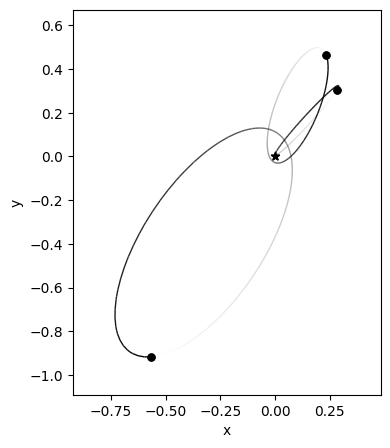

In [8]:
from dynadojo.systems.santi import NBodySystem
from dynadojo.wrappers import SystemChecker

n_bodies = 3
latent_dim = 4 * n_bodies
embed_dim = latent_dim
n = 1  # we only want 1 system with several bodies
timesteps = 10
system = SystemChecker(NBodySystem(latent_dim, embed_dim, plot_data=True, seed=0))
x0 = system.make_init_conds(n)
x = system.make_data(x0, timesteps=timesteps)

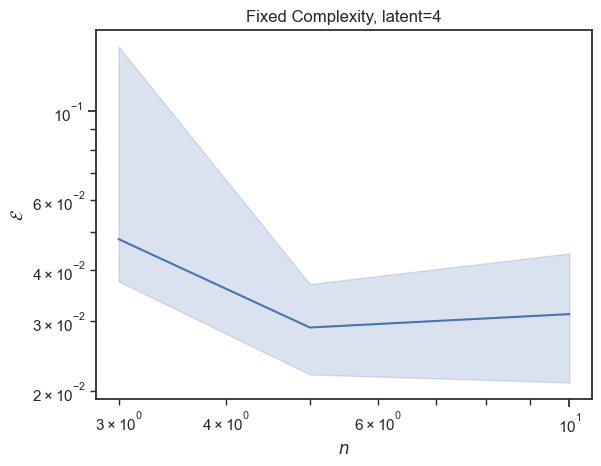

<Axes: title={'center': 'Fixed Complexity, latent=4'}, xlabel='$n$', ylabel='$\\mathcal{E}$'>

In [9]:
from dynadojo.challenges import FixedComplexity
from dynadojo.baselines.dnn import DNN

challenge = FixedComplexity(l=4, e=None, t=10, N=[3, 5, 10], reps=3, system_cls=NBodySystem, test_examples=1, test_timesteps=5)
data = challenge.evaluate(algo_cls=DNN)
challenge.plot(data)